<h1>Classification of Stellar Objects</h1>

In astronomy, the classification of stars, galaxies, and quasars is fundamental towards the understanding of our own galaxy. Galaxies are large systems of stars (Greshko, 2021), whereas quasars are active galactic nuclei powered by supermassive black holes found at the center of massive galaxies (Bañados et al. 2016). The three can be hard to differentiate solely through observation as they all radiate different wavelengths, hence, astronomers use other spectral characteristics for object identification.

**Predictive Question:** *Is it possible to use Sloan Digital Sky Survey (SDSS) measurements to predict whether a future stellar body of an unknown type is a star, quasar or galaxy?*

Data Set: Stellar Classification Dataset - SDSS17 https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

The dataset we will use in our project contains 100,000 observations of space, each of which are classified as a star, galaxy, or quasar, based on their spectral characteristics. Every observation was taken by the SDSS and was given a unique object identifier. 
Our variables of interest:

+ alpha: the right ascension angle (at J2000 epoch)
+ delta: the declination angle (at J2000 epoch)
+ u: the ultraviolet filter in the photometric system
+ g: the green filter in the photometric system
+ r: the red filter in the photometric system
+ i: the near Infrared filter in the photometric system
+ z: the infrared filter in the photometric system
+ run_ID: the run number used to identify the specific scan
+ rereun_ID: the rerun number used to specify how the image was processed
+ cam_col: the camera column used to identify the scanline within the run
+ field_ID: the field number used to identify each field
+ spec_obj_ID: the unique identifier used for optical spectroscopic objects
+ class: the object class (galaxy, star or quasar object)
+ redshift: the redshift value based on the increase in wavelength
+ plate: the plate ID used to identify each plate in SDSS
+ MJD: the Modified Julian Date used to indicate when the SDSS data was taken
+ fiber_ID: the identifier of the fiber that pointed the light at the focal plane in each observation


In [69]:
#Group project DSCI 100 Group #3

# Testing if github collaboration works

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

The following cell loads the data accurately, and checks for any missing values:

In [70]:
star_data <- read_csv("https://raw.githubusercontent.com/Margokap/DSCI100-group-03/main/star_classification.csv")
## reading data into the notebook

map_df(star_data, ~sum(is.na(.)))

Rows: 100000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): class
dbl (17): obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, fi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


obj_ID alpha delta u g r i z run_ID rerun_ID cam_col field_ID spec_obj_ID
1 0      0     0     0 0 0 0 0 0      0        0       0        0          
  class redshift plate MJD fiber_ID
1 0     0        0     0   0

After some research, we decided to select 7 variables out of the 17, with class acting as the categorical variable to be predicted. In our research, we learned that photometrics measure intensities of different wavelengths and are used by astronomers to study structure and composition of celestial objects (Grier & Rivkin, 2019) whereas redshift is used in distance, velocity, and other calculations. Hence, we decided to keep these. 

In [72]:
star_data_tidy <- select(star_data, u, g, 
                          r, i, z, redshift, class)
## selecting columns after research
star_data_tidy

u        g        r        i        z        redshift  class 
1      23.87882 22.27530 20.39501 19.16573 18.79371 0.6347936 GALAXY
2      24.77759 22.83188 22.58444 21.16812 21.61427 0.7791360 GALAXY
3      25.26307 22.66389 20.60976 19.34857 18.94827 0.6441945 GALAXY
⋮      ⋮        ⋮        ⋮        ⋮        ⋮        ⋮         ⋮     
99998  21.16916 19.26997 18.20428 17.69034 17.35221 0.1433656 GALAXY
99999  25.35039 21.63757 19.91386 19.07254 18.62482 0.4550396 GALAXY
100000 22.62171 21.79745 20.60115 20.00959 19.28075 0.5429442 GALAXY

We then decided to name our columns more appropriately, which completed our cleaning of the dataset.

In [73]:
names(star_data_tidy) <- c("UV_filter",
                            "Green_filter",
                            "Red_filter",
                            "Near_Infrared_filter",
                            "Infrared_filter",
                            "Redshift",
                            "Stellar_object")
star_data_tidy

UV_filter Green_filter Red_filter Near_Infrared_filter Infrared_filter
1      23.87882  22.27530     20.39501   19.16573             18.79371       
2      24.77759  22.83188     22.58444   21.16812             21.61427       
3      25.26307  22.66389     20.60976   19.34857             18.94827       
⋮      ⋮         ⋮            ⋮          ⋮                    ⋮              
99998  21.16916  19.26997     18.20428   17.69034             17.35221       
99999  25.35039  21.63757     19.91386   19.07254             18.62482       
100000 22.62171  21.79745     20.60115   20.00959             19.28075       
       Redshift  Stellar_object
1      0.6347936 GALAXY        
2      0.7791360 GALAXY        
3      0.6441945 GALAXY        
⋮      ⋮         ⋮             
99998  0.1433656 GALAXY        
99999  0.4550396 GALAXY        
100000 0.5429442 GALAXY

We then tried to see how our data was distributed between each stellar object, so we visualised it in a bar graph (see Figure 1.0)

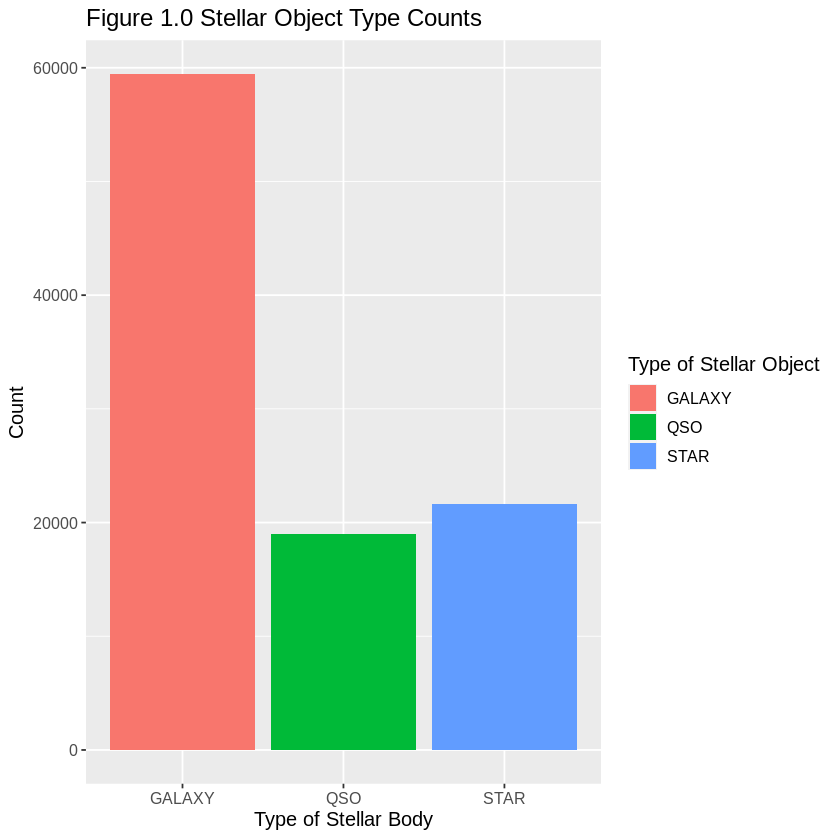

In [52]:
count <- star_data_tidy |> 
         group_by(Stellar_object) |>
         summarize(count = n())

(star_counts_plot <- ggplot(count, aes(x = Stellar_object, y = count, fill = Stellar_object)) + 
   geom_bar(stat = "identity") +
    labs(x = "Type of Stellar Body", fill = "Type of Stellar Object", y = "Count") + 
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 1.0 Stellar Object Type Counts"))

To counter this imbalance, we sampled 1000 values of each type of Stellar Object and resampled again.

In [53]:
#sampling from data to make data balanced
star_data_star <- star_data_tidy |>
                  filter(Stellar_object == "STAR") |>
                  sample_n(1000)

star_data_galaxy <- star_data_tidy |>
                  filter(Stellar_object == "GALAXY") |>
                  sample_n(1000)

star_data_qso <- star_data_tidy |>
                  filter(Stellar_object == "QSO") |>
                  sample_n(1000)

star_data_balanced <- rbind(star_data_qso, star_data_galaxy, star_data_star) |>
                  sample_n(1000)

star_table <- star_data_balanced |>
              group_by(Stellar_object) |>
              summarize(Counts = n())
star_table

Stellar_object Counts
1 GALAXY         354   
2 QSO            328   
3 STAR           318

Now, we begin splitting our dataset into testing and training.

In [55]:
star_split <- initial_split(star_data_balanced, prop = 0.75, strata = Stellar_object)
star_training <- training(star_split)
star_testing <- testing(star_split)

star_summary <- star_training |>
              group_by(Stellar_object) |>
              summarize(Mean_ultraviolet_filter = mean(UV_filter), Mean_green_filter = mean(Green_filter),
                        Mean_red_filter = mean(Red_filter), Mean_near_infrared_filter = mean(Near_Infrared_filter), Mean_infrared_filter = mean(Infrared_filter),
                        Mean_infrared_filter = mean(Infrared_filter), Mean_redshift = mean(Redshift), Number_of_stellar_type = n())
star_summary

Stellar_object Mean_ultraviolet_filter Mean_green_filter Mean_red_filter
1 GALAXY         22.62126                21.06511          19.68225       
2 QSO            21.75445                21.09021          20.75879       
3 STAR           21.27439                19.72800          19.04399       
  Mean_near_infrared_filter Mean_infrared_filter Mean_redshift
1 18.92174                  18.51886              4.403942e-01
2 20.62751                  20.38439              1.750726e+00
3 18.60673                  18.40080             -9.126107e-05
  Number_of_stellar_type
1 265                   
2 246                   
3 238

We will be using these means later on to gauge if there are any significant differences between each variable for all three types. But, first, let's visualise each of our photometrics against redshift.

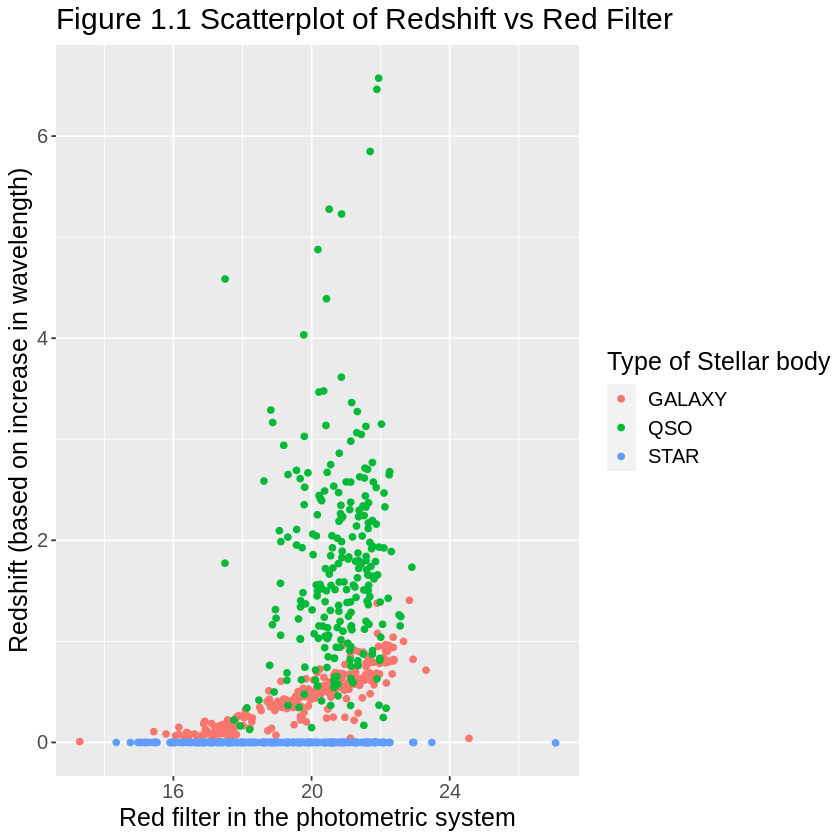

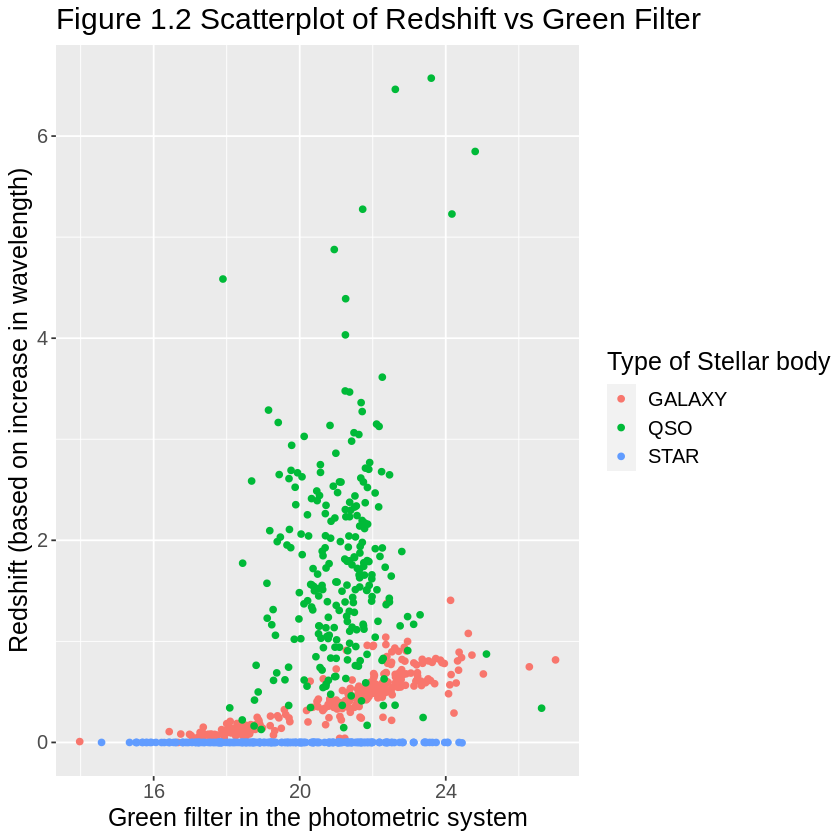

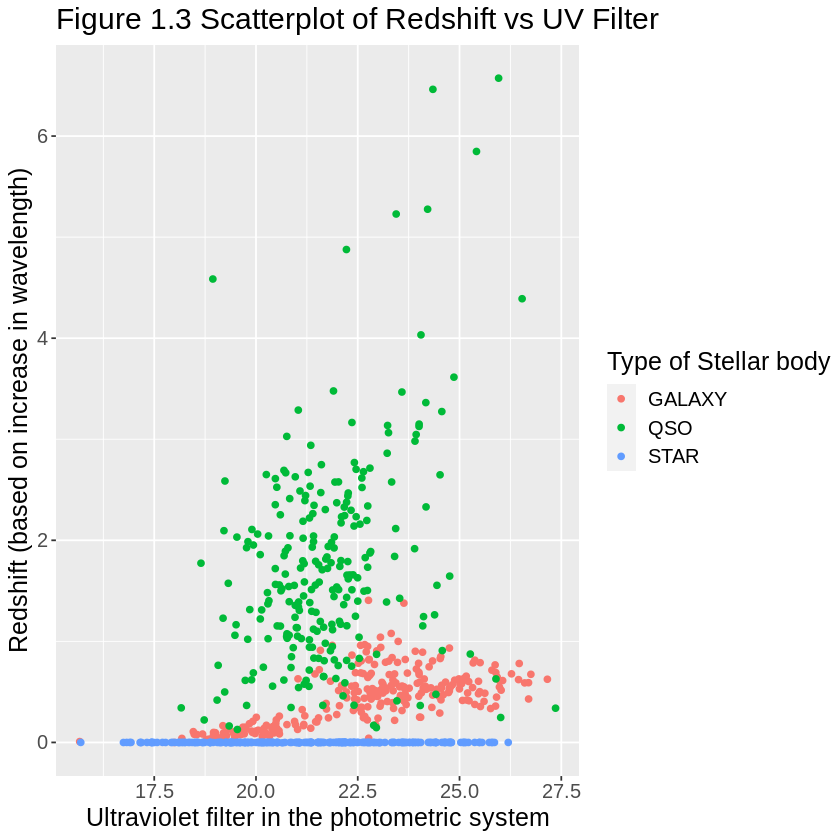

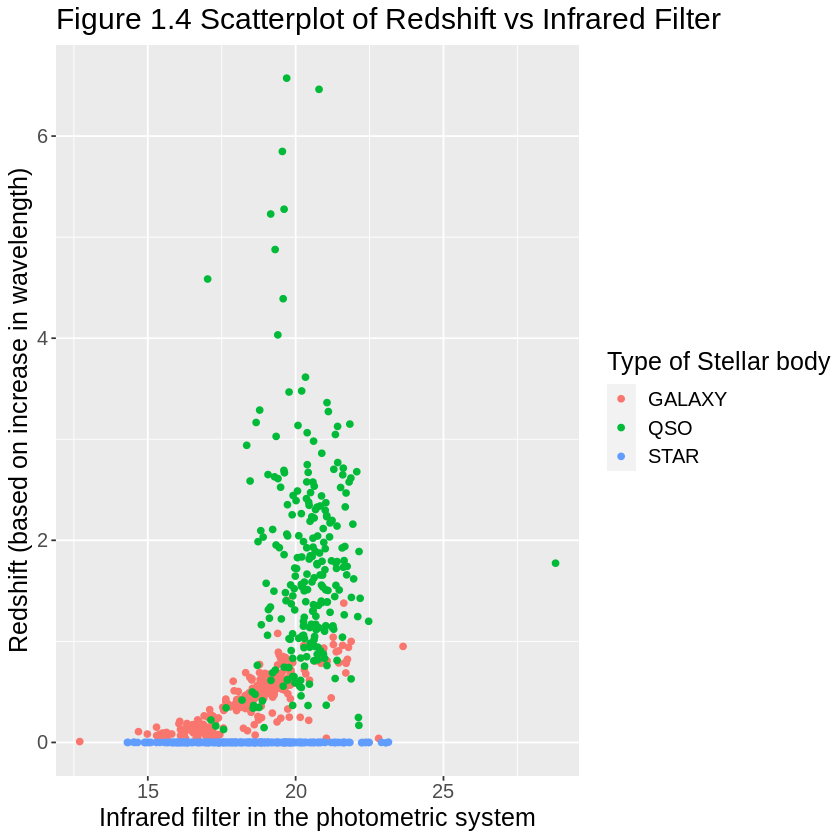

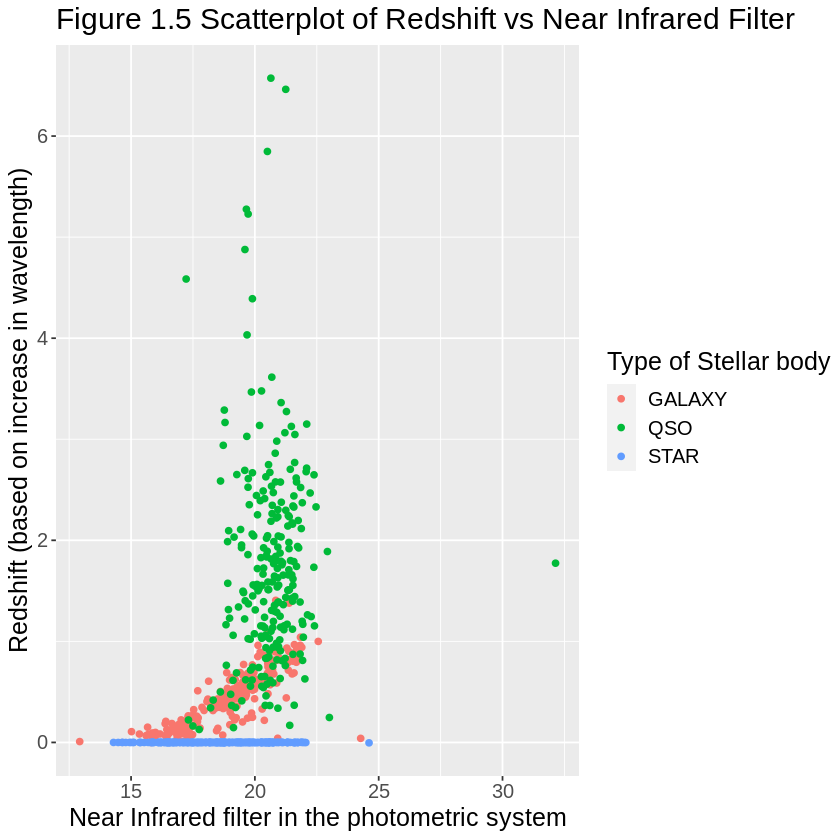

In [68]:
(redshit_vs_red_filter <- ggplot(star_training, aes(y = Redshift, x = Red_filter, color = Stellar_object)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Red filter in the photometric system", color = "Type of Stellar body") +
                              theme(text = element_text(size = 15)) +
                              ggtitle("Figure 1.1 Scatterplot of Redshift vs Red Filter"))
(redshit_vs_green_filter <- ggplot(star_training, aes(y = Redshift, x = Green_filter, color = Stellar_object)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Green filter in the photometric system", color = "Type of Stellar body") +
                              theme(text = element_text(size = 15)) +
                              ggtitle("Figure 1.2 Scatterplot of Redshift vs Green Filter"))
(redshit_vs_uv_filter <- ggplot(star_training, aes(y = Redshift, x = UV_filter, color = Stellar_object)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Ultraviolet filter in the photometric system", color = "Type of Stellar body") +
                              theme(text = element_text(size = 15)) +
                              ggtitle("Figure 1.3 Scatterplot of Redshift vs UV Filter"))
(redshit_vs_infrared_filter <- ggplot(star_training, aes(y = Redshift, x = Infrared_filter, color = Stellar_object)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Infrared filter in the photometric system", color = "Type of Stellar body") +
                              theme(text = element_text(size = 15)) +
                              ggtitle("Figure 1.4 Scatterplot of Redshift vs Infrared Filter"))
(redshit_vs_near_infrared_filter <- ggplot(star_training, aes(y = Redshift, x = Near_Infrared_filter, color = Stellar_object)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Near Infrared filter in the photometric system", color = "Type of Stellar body") +
                              theme(text = element_text(size = 15)) +
                              ggtitle("Figure 1.5 Scatterplot of Redshift vs Near Infrared Filter"))

Through our visualisations, we see some interesting patterns which we will explore in our report. 

**Method for report:**

The variables we will use to predict the type of stellar body of a new observation are ultraviolet filter, green filter, red filter, near infrared filter, infrared filter, and redshift. In previous astronomical literature and classification models, many of these factors have been demonstrated to correlate with stellar body type, and may contribute to classifying an astronomical event of type galaxy, quasar or star (Finlay-Freundlich, 1954; Wierzbiński et al. 2021; Simet et al. 2021). In our analysis, we will perform a classification using K-nearest neighbors to predict whether a new observation is of class galaxy, quasar or star, using past observations of known classes. Prior to the preprocessing of our training data, we will standardize our training data by performing scaling and centering on it so that the scales of the predictors do not unevenly impact the model. We will also be visualizing our data by seeing how that new observation fits with with the current dataset to see if our KNN prediction seems accurate.

**Expected outcomes and significance:**

We expect to find an accurate, and runtime-efficient classification model which predicts whether a new observation detected using the SDSS telescope is a star, galaxy or quasar using its spectral properties (used as predictors above in our method).

With emerging advancements in interstellar detection and space technology, it often becomes cumbersome to classify new observations manually. Our classification model serves to tackle that issue. Our model would eventually present a more feasible and efficient approach to making forecasted predictions about the object in question and can be used side-by-side with image detection in object identification. Oftentimes, the images can be misleading hence our model would aim to provide more clarity in such circumstances. Ultimately, it also saves astronomers’ time!

In astronomy, there is always room for new objects to be discovered. Since 95% of our solar system is made up of dark matter which has not been observed as of yet, it is highly likely that there exist objects which we know very little of. Our model serves as a stepping stone into that research to make educated guesses about dark matter and what objects, even though unobservable, they could most likely behave as. It could also lead into questions about the origins of these objects, how they are associated with each other and ultimately help us answer the big, boiling questions about the Universe. 